<a href="https://colab.research.google.com/github/sandipmalii/CV-Learning/blob/main/Exp5_CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving sandip pp.jpg to sandip pp.jpg


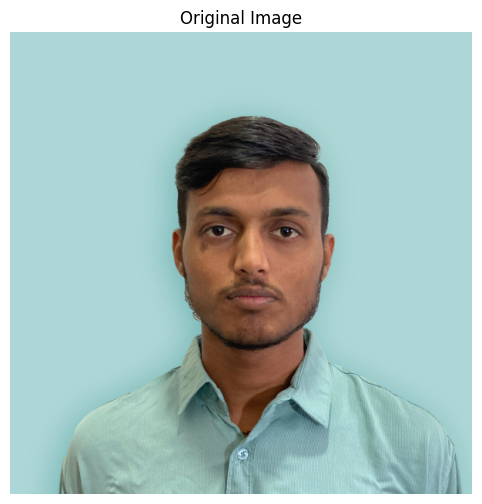

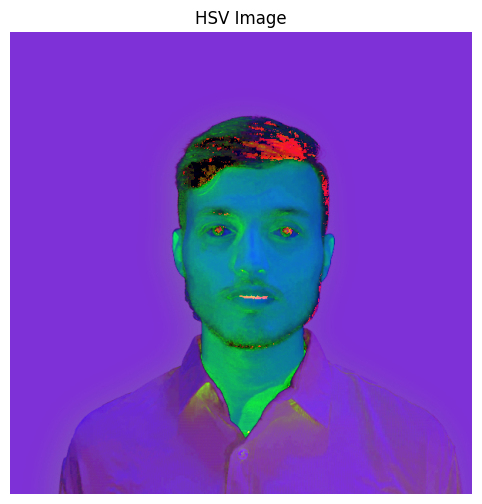

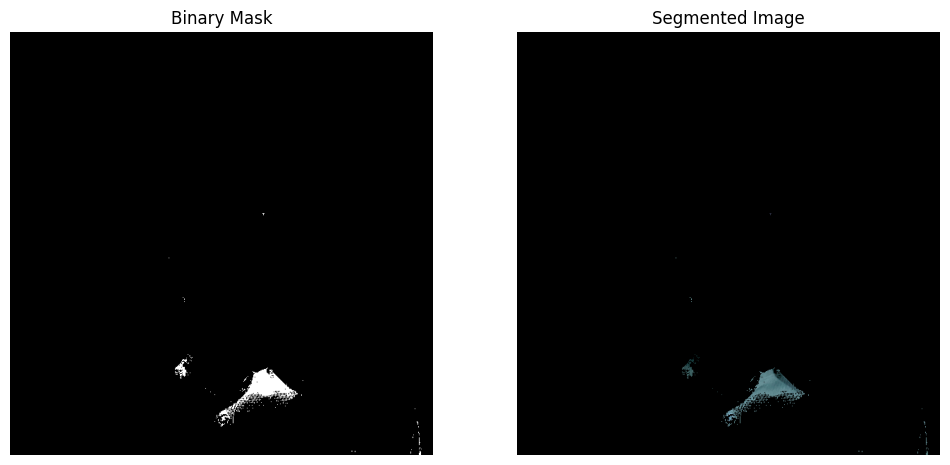

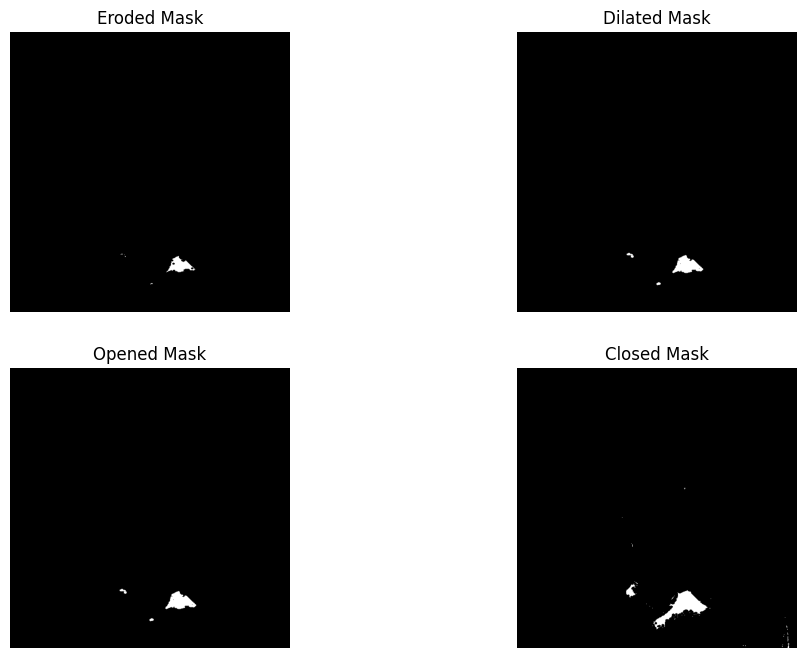

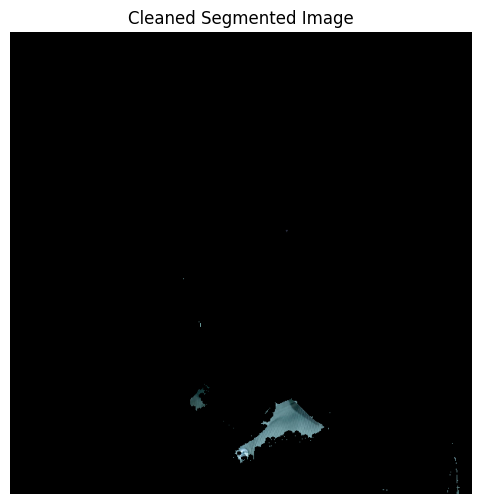

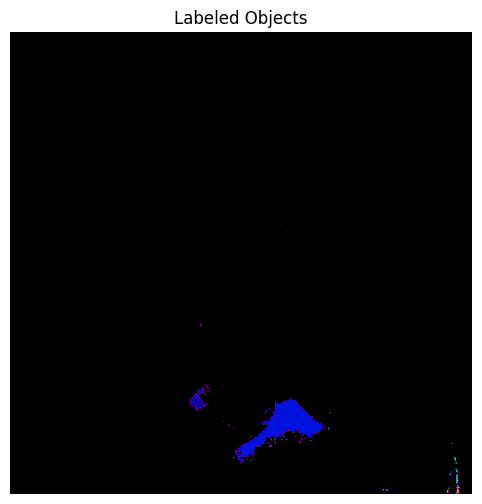

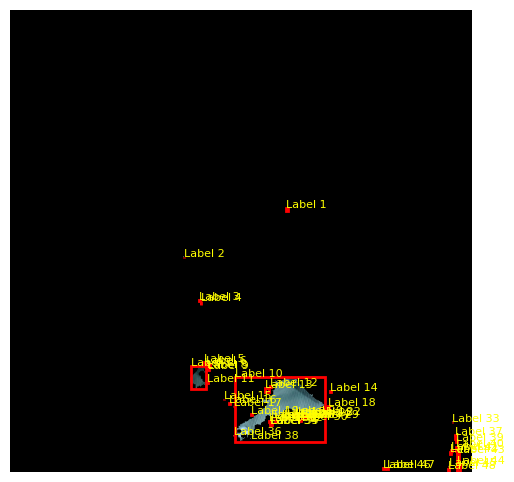

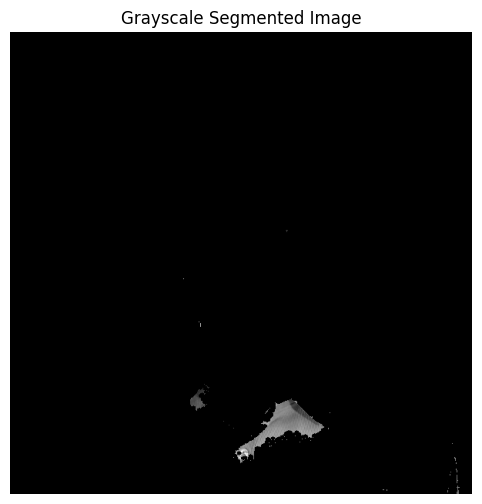

In [2]:
# Install required libraries
!pip install scikit-image opencv-python

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, morphology, measure
import cv2
from google.colab import files
from skimage.color import rgb2gray

# Option 1: Upload your image from local machine
uploaded = files.upload()

# Use the filename of the uploaded image
filename = list(uploaded.keys())[0]

# Load and display the original image
image = io.imread(filename)
plt.figure(figsize=(8, 6))
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')
plt.show()

# Convert the image to HSV color space
hsv_image = color.rgb2hsv(image)

# Display the HSV image
plt.figure(figsize=(8, 6))
plt.title('HSV Image')
plt.imshow(hsv_image)
plt.axis('off')
plt.show()

# Define color ranges for segmentation in HSV space
# Example: Detecting blue objects
lower_color = np.array([0.5, 0.3, 0.2])  # Lower HSV bounds (Hue, Saturation, Value)
upper_color = np.array([0.7, 1.0, 1.0])  # Upper HSV bounds

# Create a binary mask based on the color range
mask = cv2.inRange(hsv_image, lower_color, upper_color)

# Apply the mask to the original image
segmented_image = cv2.bitwise_and(image, image, mask=mask)

# Display the binary mask and the segmented image
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Binary Mask')
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Segmented Image')
plt.imshow(segmented_image)
plt.axis('off')
plt.show()

# Morphological operations to clean up the mask
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# Perform erosion
eroded_mask = cv2.erode(mask, kernel, iterations=1)

# Perform dilation
dilated_mask = cv2.dilate(eroded_mask, kernel, iterations=1)

# Perform opening
opened_mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# Perform closing
closed_mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

# Display the results of morphological operations
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.title('Eroded Mask')
plt.imshow(eroded_mask, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title('Dilated Mask')
plt.imshow(dilated_mask, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title('Opened Mask')
plt.imshow(opened_mask, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title('Closed Mask')
plt.imshow(closed_mask, cmap='gray')
plt.axis('off')
plt.show()

# Apply the cleaned mask to the original image
cleaned_segmented_image = cv2.bitwise_and(image, image, mask=closed_mask)

# Display the cleaned segmented image
plt.figure(figsize=(8, 6))
plt.title('Cleaned Segmented Image')
plt.imshow(cleaned_segmented_image)
plt.axis('off')
plt.show()

# Label connected components in the cleaned mask
labeled_mask = measure.label(closed_mask, connectivity=2)

# Display the labeled objects
plt.figure(figsize=(8, 6))
plt.title('Labeled Objects')
plt.imshow(labeled_mask, cmap='nipy_spectral')
plt.axis('off')
plt.show()

# Calculate properties of labeled regions
props = measure.regionprops(labeled_mask)

# Display each object in the segmented image
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(cleaned_segmented_image)
ax.set_axis_off()
for prop in props:
    # Draw bounding box around each object
    minr, minc, maxr, maxc = prop.bbox
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr,
                         fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)
    # Label the object
    ax.text(minc, minr, f'Label {prop.label}', color='yellow', fontsize=8)
plt.show()

# Optional: Convert to grayscale for further processing if needed
gray_image = rgb2gray(cleaned_segmented_image)

# Display the grayscale image
plt.figure(figsize=(8, 6))
plt.title('Grayscale Segmented Image')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()
